In [1]:
from RandomForest import RandomForestModel

# Read in data and create and instance of a Random Forest model
train_file_path = "train.xlsx"
test_file_path = "test.xlsx"
rforest = RandomForestModel(train_file_path, test_file_path)

In [2]:
# Identify missing values and fill NAs
rforest.display_missing_values()
rforest.preprocess_data()

Missing values in Train:
 r_lead                   468
r_sprint_speed           416
p_throw_rel_extension     28
p_throw_spin_rate         50
p_throw_spin_axis         27
dtype: int64

Missing values in Test:
 r_lead                    163
r_sprint_speed            147
p_throw_rel_extension      10
p_throw_spin_rate          16
p_throw_spin_axis          10
cs_prob                  1795
dtype: int64


In [3]:
# High level look at column correlations with target variable
rforest.print_correlation_report()

is_cs                     1.000000
pitch_number              0.391252
balls                     0.201358
strikes                   0.194185
c_throw_rel_speed         0.087957
p_throw_vert_break        0.083957
p_throw_ind_vert_break    0.081030
c_throw_loc_x             0.077026
p_throw_rel_speed         0.072206
p_throw_spin_axis         0.069710
p_throw_horz_break        0.060123
p_throw_loc_height        0.048019
pitcher_throws_R          0.018403
c_throw_loc_z             0.015406
p_throw_rel_side          0.013813
batter_side_L             0.005900
p_throw_rel_height        0.003067
batter_side_R            -0.005900
c_throw_loc_y            -0.017030
p_throw_rel_extension    -0.017109
pitcher_throws_L         -0.018403
p_throw_spin_rate        -0.019310
p_throw_loc_side         -0.021523
c_pop_time               -0.038179
outs                     -0.055304
r_lead                   -0.076406
r_sprint_speed           -0.174633
dtype: float64


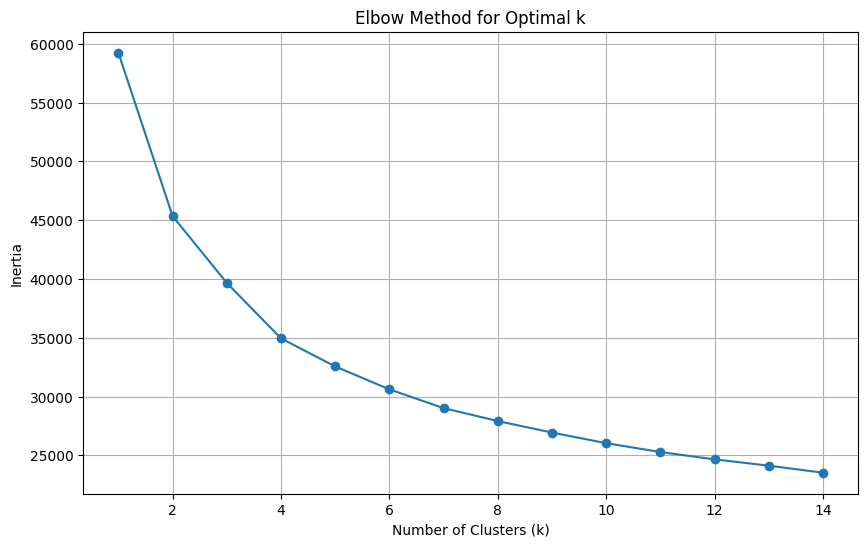

,cluster_k4,p_throw_rel_speed,p_throw_rel_height,p_throw_rel_side,p_throw_rel_extension,p_throw_loc_height,p_throw_loc_side,p_throw_ind_vert_break,p_throw_vert_break,p_throw_horz_break,p_throw_spin_rate,p_throw_spin_axis
0,0,89.856774,5.845779,-2.009609,6.203123,2.622876,-0.118582,11.818211,-22.385695,-9.044810,2146.581556,142.936655
1,1,93.104875,5.888733,1.790812,6.312605,2.750415,0.039741,14.044871,-17.630747,8.544529,2270.371909,212.006300
2,2,82.445199,5.810017,1.811646,6.137373,1.997839,-0.392430,-1.549375,-42.255414,-7.843392,2477.466398,80.666403
3,3,84.611339,5.711219,1.003193,6.126023,1.934407,0.307921,3.635240,-35.074259,10.931204,1980.611739,248.363386


In [4]:
# Identify pitch type by aggregating pitcher metrics
rforest.bin_pitch_columns()


Cluster 0:
Moderate relative speed.
Negative side release, indicating the pitches come from the left side.
Negative horizontal break, suggesting the pitches move to the pitcher's left.
This cluster might represent pitches like sinkers or left-handed sliders.

Cluster 1:
Highest relative speed.
Positive induced vertical break.
Positive horizontal break, suggesting the pitches move to the pitcher's right.
This cluster might represent hard-throwing pitches, likely fastballs.

Cluster 2:
Lower relative speed.
Large negative vertical break.
Negative horizontal break, suggesting the pitches move to the pitcher's left.
Highest spin rate.
These characteristics might suggest off-speed pitches, possibly curveballs.

Cluster 3:
Moderate relative speed.
Negative vertical break but not as extreme as Cluster 2.
Positive horizontal break, suggesting the pitches move to the pitcher's right.
Lower spin rate.
These characteristics might suggest pitches with some movement but thrown with less spin, possibly changeups or two-seam fastballs.


In [5]:
X_train, X_val, y_train, y_val = rforest.split_train()
y_pred = rforest.fit_and_train(X_train, X_val, y_train)

rforest.print_classification_report(y_pred, y_val)

Accuracy: 0.7654702970297029
Class report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1042
           1       0.74      0.52      0.61       574

    accuracy                           0.77      1616
   macro avg       0.76      0.71      0.72      1616
weighted avg       0.76      0.77      0.75      1616



In [6]:
# Assign probabilities from 0 to 1 to test data
rforest.predict_test_data()

First 5 rows of test dataset with populated 'cs_prob' column:
0    0.44
1    0.54
2    0.24
3    0.13
4    0.60
Name: cs_prob, dtype: float64


In [ ]:
# Output test dataset with new probability of caught-stealing assigned
rforest.output_test_with_prob()